In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# One hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.a1_error = np.dot(self.output_delta, self.W2.T)
        self.a1_delta = self.a1_error * self.sigmoid_derivative(self.a1)
        
        self.W2 += np.dot(self.a1.T, self.output_delta) * self.learning_rate
        self.b2 += np.sum(self.output_delta, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, self.a1_delta) * self.learning_rate
        self.b1 += np.sum(self.a1_delta, axis=0, keepdims=True) * self.learning_rate
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}, Loss: {loss}')

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 10000

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X_train, y_train, epochs)

# Predict on test set
y_pred = nn.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred_classes)
cm = confusion_matrix(y_true, y_pred_classes)

print(f'Accuracy: {accuracy}')




Epoch 0, Loss: 0.30641751640739145
Epoch 1000, Loss: 0.010025899449453984
Epoch 2000, Loss: 0.008038692948005759
Epoch 3000, Loss: 0.004608933639734331
Epoch 4000, Loss: 0.0028798564323542163
Epoch 5000, Loss: 0.002017559773760009
Epoch 6000, Loss: 0.001176647236136013
Epoch 7000, Loss: 0.0006849071201611718
Epoch 8000, Loss: 0.00045093743827505513
Epoch 9000, Loss: 0.0003266462441575623
Accuracy: 0.9333333333333333


In [6]:
print('Confusion Matrix:')
print(cm)



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


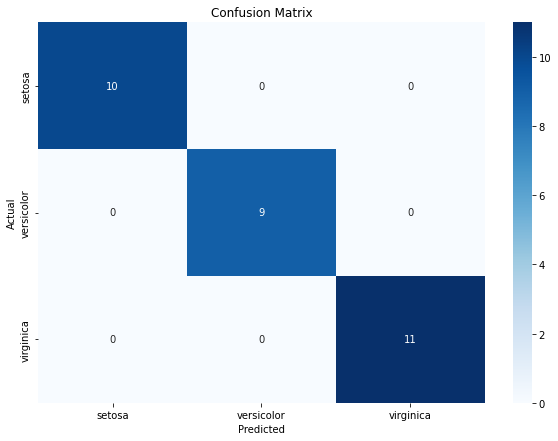

In [5]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()